In [3]:
from spotify_client import *
import pandas as pd
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= client_id,
                                                           client_secret= client_secret))

In [5]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [6]:
tracks = get_playlist_tracks("spotify", "7htu5ftbLBRFAwiuHVcUAg")

In [136]:
len(tracks)

9988

In [127]:
len(tracks[0]['track']['uri'])

36

In [137]:
def features(tracks):
    
    song_features = {}
    
    for i in range(len(tracks)):
        song_features[tracks[i]['track']['id']] = sp.audio_features(tracks[i]["track"]["uri"])
    
    return song_features

In [9]:
sp.audio_features(tracks[0]["track"]["uri"])

[{'danceability': 0.511,
  'energy': 0.472,
  'key': 4,
  'loudness': -9.277,
  'mode': 1,
  'speechiness': 0.091,
  'acousticness': 0.534,
  'instrumentalness': 0.614,
  'liveness': 0.11,
  'valence': 0.0399,
  'tempo': 127.978,
  'type': 'audio_features',
  'id': '2MvvoeRt8NcOXWESkxWn3g',
  'uri': 'spotify:track:2MvvoeRt8NcOXWESkxWn3g',
  'track_href': 'https://api.spotify.com/v1/tracks/2MvvoeRt8NcOXWESkxWn3g',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2MvvoeRt8NcOXWESkxWn3g',
  'duration_ms': 258969,
  'time_signature': 4}]

In [138]:
x = features(tracks)

In [139]:
songs = list(x.keys())

In [141]:
feature_names = list(x[songs[0]][0].keys())

In [142]:
feature_names

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [143]:
danceability = []
energy=[]
key=[]
loudness=[]
mode=[]
speechiness=[]
acousticness=[]
instrumentalness=[]
liveness=[]
valence=[]
tempo=[]
type=[]
id=[]
uri=[]
track_href=[]
analysis_url=[]
duration_ms=[]
time_signature=[]

In [144]:
x[songs[0]][0]

{'danceability': 0.511,
 'energy': 0.472,
 'key': 4,
 'loudness': -9.277,
 'mode': 1,
 'speechiness': 0.091,
 'acousticness': 0.534,
 'instrumentalness': 0.614,
 'liveness': 0.11,
 'valence': 0.0399,
 'tempo': 127.978,
 'type': 'audio_features',
 'id': '2MvvoeRt8NcOXWESkxWn3g',
 'uri': 'spotify:track:2MvvoeRt8NcOXWESkxWn3g',
 'track_href': 'https://api.spotify.com/v1/tracks/2MvvoeRt8NcOXWESkxWn3g',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2MvvoeRt8NcOXWESkxWn3g',
 'duration_ms': 258969,
 'time_signature': 4}

In [145]:
for song in range(len(x)):

    #x[songs[song]][0][feature_names[1]]
    danceability.append(x[songs[song]][0][feature_names[0]])
    energy.append(x[songs[song]][0][feature_names[1]])
    key.append(x[songs[song]][0][feature_names[2]])
    loudness.append(x[songs[song]][0][feature_names[3]])
    mode.append(x[songs[song]][0][feature_names[4]])
    speechiness.append(x[songs[song]][0][feature_names[5]])
    acousticness.append(x[songs[song]][0][feature_names[6]])
    instrumentalness.append(x[songs[song]][0][feature_names[7]])
    liveness.append(x[songs[song]][0][feature_names[8]])
    valence.append(x[songs[song]][0][feature_names[9]])
    tempo.append(x[songs[song]][0][feature_names[10]])
    type.append(x[songs[song]][0][feature_names[11]])
    id.append(x[songs[song]][0][feature_names[12]])
    uri.append(x[songs[song]][0][feature_names[13]])
    track_href.append(x[songs[song]][0][feature_names[14]])
    analysis_url.append(x[songs[song]][0][feature_names[15]])
    duration_ms.append(x[songs[song]][0][feature_names[16]])
    time_signature.append(x[songs[song]][0][feature_names[17]])


In [146]:
df = pd.DataFrame([songs,danceability,
 energy,
 key,
 loudness,
 mode,
 speechiness,
 acousticness,
 instrumentalness,
 liveness,
 valence,
 tempo,
 type,
 id,
 uri,
 track_href,
 analysis_url,
 duration_ms,
 time_signature])

In [147]:
df = df.T

In [148]:
df.columns = ['song_id','danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9968 entries, 0 to 9967
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   song_id           9968 non-null   object
 1   danceability      9968 non-null   object
 2   energy            9968 non-null   object
 3   key               9968 non-null   object
 4   loudness          9968 non-null   object
 5   mode              9968 non-null   object
 6   speechiness       9968 non-null   object
 7   acousticness      9968 non-null   object
 8   instrumentalness  9968 non-null   object
 9   liveness          9968 non-null   object
 10  valence           9968 non-null   object
 11  tempo             9968 non-null   object
 12  type              9968 non-null   object
 13  id                9968 non-null   object
 14  uri               9968 non-null   object
 15  track_href        9968 non-null   object
 16  analysis_url      9968 non-null   object
 17  duration_ms   

In [150]:
df

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2MvvoeRt8NcOXWESkxWn3g,0.511,0.472,4,-9.277,1,0.091,0.534,0.614,0.11,0.0399,127.978,audio_features,2MvvoeRt8NcOXWESkxWn3g,spotify:track:2MvvoeRt8NcOXWESkxWn3g,https://api.spotify.com/v1/tracks/2MvvoeRt8NcO...,https://api.spotify.com/v1/audio-analysis/2Mvv...,258969,4
1,6UFivO2zqqPFPoQYsEMuCc,0.742,0.546,1,-7.694,1,0.0315,0.172,0.38,0.115,0.868,104.996,audio_features,6UFivO2zqqPFPoQYsEMuCc,spotify:track:6UFivO2zqqPFPoQYsEMuCc,https://api.spotify.com/v1/tracks/6UFivO2zqqPF...,https://api.spotify.com/v1/audio-analysis/6UFi...,260520,4
2,4Musyaro0NM5Awx8b5c627,0.609,0.629,10,-5.024,1,0.0264,0.425,0,0.0978,0.325,99.955,audio_features,4Musyaro0NM5Awx8b5c627,spotify:track:4Musyaro0NM5Awx8b5c627,https://api.spotify.com/v1/tracks/4Musyaro0NM5...,https://api.spotify.com/v1/audio-analysis/4Mus...,241467,4
3,1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8,-5.119,1,0.0294,0.131,0,0.0527,0.522,104.945,audio_features,1CkvWZme3pRgbzaxZnTl5X,spotify:track:1CkvWZme3pRgbzaxZnTl5X,https://api.spotify.com/v1/tracks/1CkvWZme3pRg...,https://api.spotify.com/v1/audio-analysis/1Ckv...,228293,4
4,4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2,-7.237,0,0.0593,0.146,0,0.118,0.227,110.443,audio_features,4lLtanYk6tkMvooU0tWzG8,spotify:track:4lLtanYk6tkMvooU0tWzG8,https://api.spotify.com/v1/tracks/4lLtanYk6tkM...,https://api.spotify.com/v1/audio-analysis/4lLt...,223253,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9963,2foI6dVPMRC7B3qwjca19u,0.415,0.339,0,-10.278,1,0.0316,0.703,0,0.175,0.34,131.765,audio_features,2foI6dVPMRC7B3qwjca19u,spotify:track:2foI6dVPMRC7B3qwjca19u,https://api.spotify.com/v1/tracks/2foI6dVPMRC7...,https://api.spotify.com/v1/audio-analysis/2foI...,213747,3
9964,1ZfK0enTcbDvb3LznGG7Wl,0.494,0.531,7,-8.146,1,0.418,0.586,0,0.325,0.212,79.22,audio_features,1ZfK0enTcbDvb3LznGG7Wl,spotify:track:1ZfK0enTcbDvb3LznGG7Wl,https://api.spotify.com/v1/tracks/1ZfK0enTcbDv...,https://api.spotify.com/v1/audio-analysis/1ZfK...,170427,4
9965,1GE57bvEZMZijuQAbQve3H,0.534,0.802,7,-4.669,0,0.219,0.154,4.1e-06,0.171,0.748,179.998,audio_features,1GE57bvEZMZijuQAbQve3H,spotify:track:1GE57bvEZMZijuQAbQve3H,https://api.spotify.com/v1/tracks/1GE57bvEZMZi...,https://api.spotify.com/v1/audio-analysis/1GE5...,195957,4
9966,7jA5OcunWRSYXq98puhAX8,0.499,0.468,0,-9.995,0,0.0396,0.795,0.88,0.0899,0.0763,141.463,audio_features,7jA5OcunWRSYXq98puhAX8,spotify:track:7jA5OcunWRSYXq98puhAX8,https://api.spotify.com/v1/tracks/7jA5OcunWRSY...,https://api.spotify.com/v1/audio-analysis/7jA5...,157000,4


In [151]:
to_numeric = ['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [152]:
for i in to_numeric:
    df[i] = df[i].astype(float)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9968 entries, 0 to 9967
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           9968 non-null   object 
 1   danceability      9968 non-null   float64
 2   energy            9968 non-null   float64
 3   key               9968 non-null   float64
 4   loudness          9968 non-null   float64
 5   mode              9968 non-null   float64
 6   speechiness       9968 non-null   float64
 7   acousticness      9968 non-null   float64
 8   instrumentalness  9968 non-null   float64
 9   liveness          9968 non-null   float64
 10  valence           9968 non-null   float64
 11  tempo             9968 non-null   float64
 12  type              9968 non-null   object 
 13  id                9968 non-null   object 
 14  uri               9968 non-null   object 
 15  track_href        9968 non-null   object 
 16  analysis_url      9968 non-null   object 


In [154]:
to_drop = [
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url']

In [155]:
df.drop(to_drop, axis = 1, inplace = True)

# Clustering

In [156]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [157]:
X = df

In [158]:
X.set_index('song_id', inplace = True)

In [159]:
X_prep = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

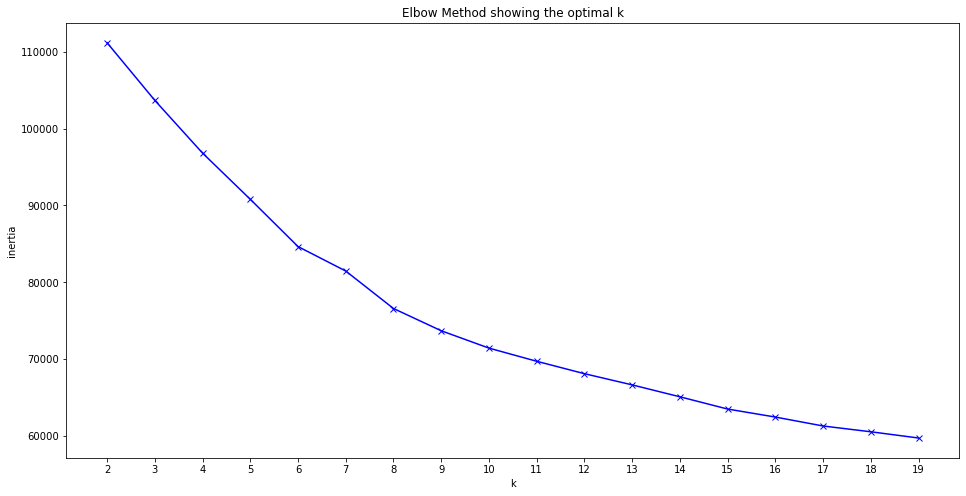

In [160]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

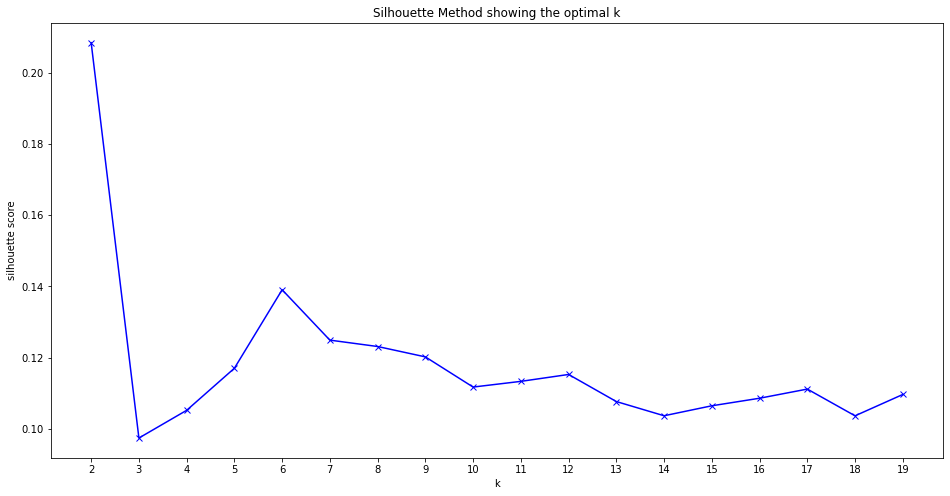

In [161]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [162]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=6, random_state=1234)

In [163]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    1703
1     479
2    2508
3    4254
4     645
5     379
dtype: int64

In [164]:
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
song_id,,,,,,,,,,,,,,
2MvvoeRt8NcOXWESkxWn3g,0.511,0.472,4.0,-9.277,1.0,0.0910,0.534,0.614,0.1100,0.0399,127.978,258969.0,4.0,5
6UFivO2zqqPFPoQYsEMuCc,0.742,0.546,1.0,-7.694,1.0,0.0315,0.172,0.380,0.1150,0.8680,104.996,260520.0,4.0,5
4Musyaro0NM5Awx8b5c627,0.609,0.629,10.0,-5.024,1.0,0.0264,0.425,0.000,0.0978,0.3250,99.955,241467.0,4.0,3
1CkvWZme3pRgbzaxZnTl5X,0.729,0.756,8.0,-5.119,1.0,0.0294,0.131,0.000,0.0527,0.5220,104.945,228293.0,4.0,3
4lLtanYk6tkMvooU0tWzG8,0.706,0.558,2.0,-7.237,0.0,0.0593,0.146,0.000,0.1180,0.2270,110.443,223253.0,4.0,2
